In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


ad_systems_accounts = pd.read_csv('C:/Users/User/Desktop/jupyter/Test task for product analyst/ad_systems_accounts.csv', sep = ',')
exchange_rates = pd.read_csv('C:/Users/User/Desktop/jupyter/Test task for product analyst/exchange_rates.csv', sep = ',')
transfers_to_ad_systems = pd.read_csv('C:/Users/User/Desktop/jupyter/Test task for product analyst/transfers_to_ad_systems.csv', sep = ',')
users_registrations = pd.read_csv('C:/Users/User/Desktop/jupyter/Test task for product analyst/users_registrations.csv', sep = ',')

In [2]:
# Left join
K_Reg_User = transfers_to_ad_systems.merge(users_registrations, on = 'user_id', how='left')

# Для облегчения сортировки добавим номер дня недели в отдельные поля
K_Reg_User['date_payed_num'] =  pd.to_datetime(K_Reg_User['date_payed']).dt.dayofweek+1
K_Reg_User['user_date_registration_num'] = pd.to_datetime(K_Reg_User['user_date_registration']).dt.dayofweek+1

#Дату из timestamp в day_name
K_Reg_User['date_payed'] = pd.to_datetime(K_Reg_User['date_payed']).dt.day_name(locale='ru_RU')
#Дату из timestamp в day_name
K_Reg_User['user_date_registration'] = pd.to_datetime(K_Reg_User['user_date_registration']).dt.day_name(locale='ru_RU')

### В какие дни сумма сделок больше (за все время)

In [3]:
Day_Sum = K_Reg_User.groupby(['date_payed_num','date_payed']).agg({'price': 'sum'})
Day_Sum

,,price
date_payed_num,date_payed,
1,Понедельник,"11,782,780,250.45"
2,Вторник,"11,481,784,334.68"
3,Среда,"11,185,552,909.85"
4,Четверг,"11,338,049,809.71"
5,Пятница,"11,486,517,171.54"
6,Суббота,"11,456,422,880.55"
7,Воскресенье,"11,732,267,711.41"


<AxesSubplot:xlabel='date_payed'>

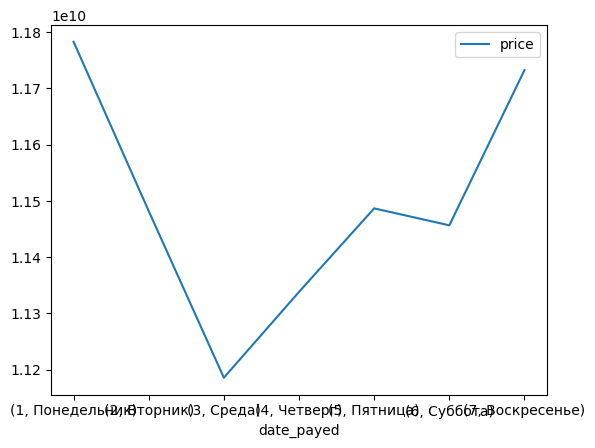

In [4]:
Day_Sum.plot(xlabel='date_payed')

###  В какие дни чаще регестрируются люди

In [5]:
Day_user_count = K_Reg_User.groupby(['user_date_registration_num','user_date_registration']).agg({'user_id': 'count'})
Day_user_count

,,user_id
user_date_registration_num,user_date_registration,
1,Понедельник,74635
2,Вторник,77328
3,Среда,71895
4,Четверг,77043
5,Пятница,80289
6,Суббота,79809
7,Воскресенье,72522


<AxesSubplot:xlabel='user_date_registration_num,user_date_registration'>

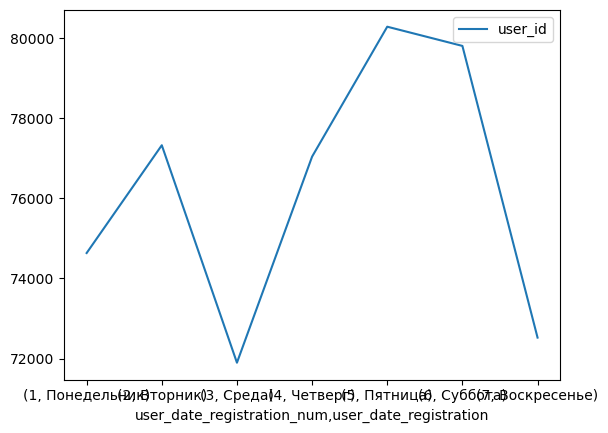

In [6]:
Day_user_count.plot()

###  В какие дни количество сделок больше (за все время)

In [7]:
Day_Cou = K_Reg_User.groupby(['date_payed_num','date_payed']).agg({'price': 'count'})
Day_Cou

,,price
date_payed_num,date_payed,
1,Понедельник,77947
2,Вторник,76093
3,Среда,74291
4,Четверг,75231
5,Пятница,76160
6,Суббота,76199
7,Воскресенье,77600


<AxesSubplot:xlabel='date_payed_num,date_payed'>

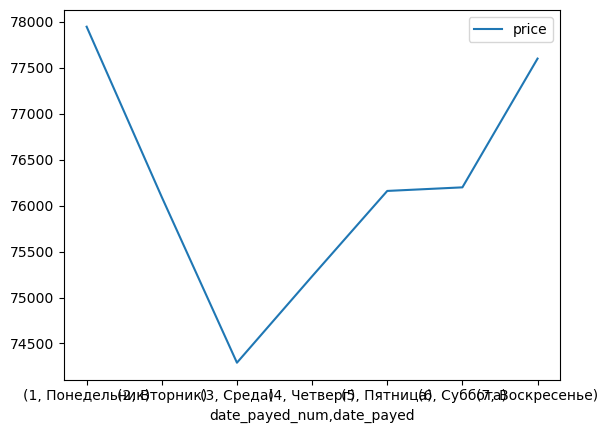

In [8]:
Day_Cou.plot()

####  Вывод: Чаще всего люди регистрируются В пятницу и субботу, а сделки проводят в воскресенье и понедельник. В среду активности пользователей меньше всего.